In [1]:
# !pip install hydra-core

     ---------------------------------------- 0.0/117.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/117.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/117.0 kB ? eta -:--:--
     --------- --------------------------- 30.7/117.0 kB 262.6 kB/s eta 0:00:01
     ------------------- ----------------- 61.4/117.0 kB 363.1 kB/s eta 0:00:01
     ---------------------------------- - 112.6/117.0 kB 544.7 kB/s eta 0:00:01
     ------------------------------------ 117.0/117.0 kB 526.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/154.5 kB ? eta -:--:--
   ---------------------------------------  153.6/154.5 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 154.5/154.5 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/79.5 kB ? eta -:--:--
   ---------------------------------------- 79.5/79.5 kB 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qpd 0.4.4 requires antlr4-python3-runtime<4.12,>=4.11.1, but you have antlr4-python3-runtime 4.9.3 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

import mlflow
import mlflow.sklearn

import os
import hydra
from omegaconf import DictConfig
from hydra.experimental import compose, initialize_config_dir

In [4]:
hydra.core.global_hydra.GlobalHydra.instance().clear()

All parameters in mushroom_process.yaml: {'data': {'raw': '../data/raw/02_mushroom_data.csv', 'ppath': '../data/processed/'}, 'setup': {'target': 'class', 'trainsize': 0.8, 'transform': True, 'norm': True, 'session': 123, 'logexp': True, 'expname': 'mushroom', 'rmoutlier': True, 'fold': 10}}


,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(7932, 23)"
5,Transformed data shape,"(7614, 108)"
6,Transformed train set shape,"(6027, 108)"
7,Transformed test set shape,"(1587, 108)"
8,Ordinal features,5
9,Categorical features,22


Ordinal features: {'bruises': ['bruises', 'no'], 'gill-attachment': ['attached', 'free'], 'gill-spacing': ['close', 'crowded'], 'gill-size': ['broad', 'narrow'], 'stalk-shape': ['enlarging', 'tapering']}
Categorical features: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
Data was processed and written at ../data/processed/mr_process.csv.


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9981,1.0000,0.9981,0.9981,0.9981,0.9962,0.9962,1.0980
et,Extra Trees Classifier,0.9956,1.0000,0.9956,0.9956,0.9956,0.9912,0.9912,1.2880
xgboost,Extreme Gradient Boosting,0.9954,1.0000,0.9954,0.9955,0.9954,0.9909,0.9909,1.3820
lightgbm,Light Gradient Boosting Machine,0.9940,0.9950,0.9940,0.9941,0.9940,0.9880,0.9881,1.2210
lr,Logistic Regression,0.9896,0.9988,0.9896,0.9899,0.9896,0.9792,0.9795,0.7330
ada,Ada Boost Classifier,0.9880,0.9952,0.9880,0.9884,0.9880,0.9760,0.9764,1.0390
qda,Quadratic Discriminant Analysis,0.9879,0.9880,0.9879,0.9883,0.9879,0.9757,0.9762,0.9690
catboost,CatBoost Classifier,0.9871,0.9999,0.9871,0.9875,0.9871,0.9742,0.9745,2.8740
svm,SVM - Linear Kernel,0.9868,0.0000,0.9868,0.9873,0.9868,0.9735,0.9740,1.0770
ridge,Ridge Classifier,0.9868,0.0000,0.9868,0.9872,0.9868,0.9735,0.9739,1.1860


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9937,0.9937,0.9937,0.9937,0.9937,0.9874,0.9874
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9984,0.9999,0.9984,0.9984,0.9984,0.9968,0.9969
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9921,0.9937,0.9921,0.9922,0.9921,0.9843,0.9843
5,0.9968,0.9969,0.9968,0.9969,0.9968,0.9937,0.9937
6,0.9953,0.9983,0.9953,0.9953,0.9953,0.9905,0.9905
7,0.9968,0.9984,0.9968,0.9968,0.9968,0.9937,0.9937
8,0.9984,0.9984,0.9984,0.9984,0.9984,0.9968,0.9969


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


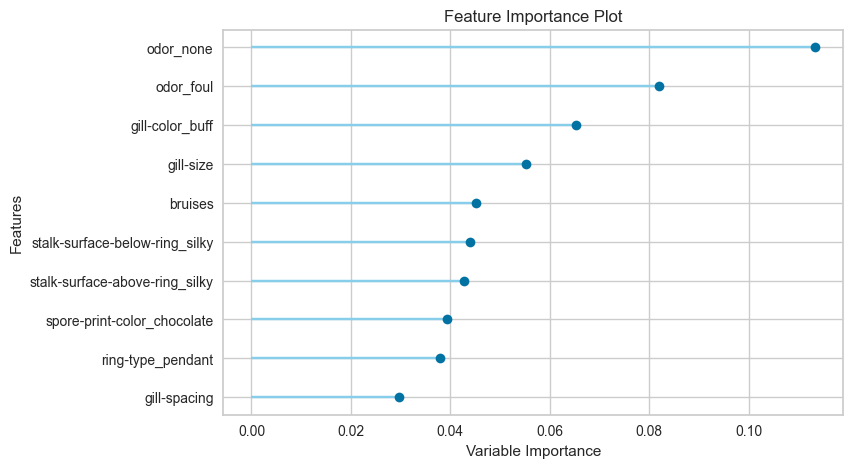

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9981,1.0000,0.9981,0.9981,0.9981,0.9962,0.9962


     cap-shape cap-surface cap-color  bruises   odor gill-attachment  \
740     convex     fibrous     brown       no   none            free   
4366    convex       scaly    yellow       no   foul            free   
2575    convex       scaly     brown  bruises   none            free   
7642   knobbed     fibrous      gray       no   none            free   
1634    convex      smooth     brown       no   none            free   
...        ...         ...       ...      ...    ...             ...   
7193    convex       scaly       red       no  spicy            free   
1244      flat      smooth     brown       no   none            free   
4823    convex     fibrous    yellow       no   foul            free   
7166      flat       scaly     brown       no  musty            free   
3505      flat       scaly     brown  bruises   none            free   

     gill-spacing gill-size gill-color stalk-shape  ... veil-type veil-color  \
740         close    narrow       pink   enlarging  ...

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\USER\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              m...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criteri

Registered model 'mushroom_model' already exists. Creating a new version of this model...
Created version '2' of model 'mushroom_model'.


In [5]:
def process_train():
    """Function to process the data"""
    root_directory = "C:/Users/USER/IT3385 - MLOPS/MLOPS/"
    config_dir = os.path.normpath(os.path.join(root_directory, "config", "process"))
    
    initialize_config_dir(config_dir=config_dir)
    config = compose(config_name="mushroom_process")
    print('All parameters in mushroom_process.yaml: ' + str(config))

    mushroom = pd.read_csv(config.data.raw)

    mushroom = mushroom.dropna()

    mr_setup = setup(
        data=mushroom,
        target=config.setup.target,
        train_size=config.setup.trainsize,
        transformation=config.setup.transform,
        normalize=config.setup.norm,
        session_id=config.setup.session,
        log_experiment=config.setup.logexp,
        experiment_name=config.setup.expname,
        remove_outliers=config.setup.rmoutlier,
        fold=config.setup.fold
    )

    print(f'Ordinal features: {mr_setup._fxs["Ordinal"]}')
    print(f'Categorical features: {mr_setup._fxs["Categorical"]}')

    mr_transformed = mr_setup.get_config('dataset_transformed')

    file_name='mr_process.csv'
    full_file = os.path.join(config.data.ppath, file_name)
    mr_transformed.to_csv(full_file, index=False)

    print(f'Data was processed and written at {full_file}.')

    # modelling
    best = compare_models()
    print(best)

    tuned_rf = tune_model(best, return_tuner=True)
    best_rf = tuned_rf[0]
    plot_model(best_rf, plot='feature')

    mr_pred = predict_model(best_rf)
    print(mr_pred)
    
    evaluate_model(best_rf)

    #save pipeline
    final_rf = finalize_model(best_rf)
    save_model(final_rf, 'mushroom_pipeline')
    load_pipeline = load_model('mushroom_pipeline')
    print(load_pipeline)

    y_true = mr_pred['class']
    y_pred = mr_pred['prediction_label']
    label_encoder = LabelEncoder()
    y_true_encoded = label_encoder.fit_transform(y_true)
    y_pred_encoded = label_encoder.transform(y_pred)
    accuracy = accuracy_score(y_true_encoded, y_pred_encoded)
    auc = roc_auc_score(y_true_encoded, y_pred_encoded)
    precision = precision_score(y_true_encoded, y_pred_encoded)
    recall = recall_score(y_true_encoded, y_pred_encoded)
    f1 = f1_score(y_true_encoded, y_pred_encoded)
    mlflow.end_run()

    with mlflow.start_run() as run:
        mlflow.log_param('train_size', 0.8)
        mlflow.log_param('transformation', True)
        mlflow.log_param('normalize', True)
        mlflow.log_param('remove_outliers', True)
        mlflow.log_param('fold', 5)
    
        # Log metrics
        mlflow.log_metric('Accuracy', accuracy)
        mlflow.log_metric('AUC', auc)
        mlflow.log_metric('Precision', precision)
        mlflow.log_metric('Recall', recall)
        mlflow.log_metric('F1-Score', f1)
    
        # Log the experiment name and run ID
        mlflow.set_experiment('mushroom')
        mlflow.log_param('experiment_name', 'mushroom')
        mlflow.log_param('run_id', run.info.run_id)
        
        # Log the pipeline object using mlflow.sklearn
        mlflow.sklearn.log_model(sk_model=best_rf, registered_model_name='mushroom_model', artifact_path='sk_model')
process_train()